# Ryan Savin --- Subgroup #1

In [23]:
# Import libraries
import joblib
import numpy as np
import pandas as pd
import xgboost as XGB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

# EDA and Preprocessing

In [2]:
S1 = pd.read_csv('subgroub1.csv')
S1

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Index,cluster
0,0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,0.303582,...,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034,2,1
1,0,0.522742,0.579536,0.575566,0.619114,0.619114,0.999075,0.797525,0.809443,0.303539,...,0.624266,0.619116,0.841468,0.275937,0.026791,0.565158,1,0.087300,9,1
2,0,0.590114,0.611753,0.634991,0.611403,0.611403,0.999206,0.797672,0.809558,0.303521,...,0.622830,0.611404,0.842483,0.275332,0.026791,0.565158,1,0.159042,13,1
3,0,0.501877,0.547700,0.562557,0.647782,0.647782,0.999076,0.797459,0.809416,0.303423,...,0.624350,0.647779,0.840367,0.276460,0.027138,0.566402,1,0.064648,14,1
4,0,0.480866,0.546991,0.529953,0.595994,0.594863,0.998926,0.797466,0.809373,0.303749,...,0.624691,0.595993,0.840578,0.276414,0.026797,0.565186,1,0.066087,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0,0.548091,0.585259,0.595535,0.629477,0.629477,0.999244,0.797747,0.809583,0.303575,...,0.623750,0.629477,0.841954,0.276940,0.026804,0.565221,1,0.053096,5796,1
1440,0,0.506557,0.582370,0.549601,0.604794,0.606221,0.999038,0.797610,0.809477,0.303765,...,0.624392,0.604790,0.841841,0.276718,0.026791,0.565158,1,0.057755,5799,1
1441,0,0.553795,0.636993,0.606671,0.648323,0.648323,0.999388,0.798010,0.809855,0.303732,...,0.623890,0.648322,0.843620,0.277068,0.026821,0.565297,1,0.050788,5803,1
1442,0,0.513626,0.573321,0.555758,0.646665,0.646665,0.999066,0.797506,0.809396,0.303525,...,0.623845,0.646663,0.842716,0.287670,0.026791,0.565159,1,0.017685,5805,1


In [3]:
S1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 98 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 1444 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  1444 non-null   float64
 2    ROA(A) before interest and % after tax                   1444 non-null   float64
 3    ROA(B) before interest and depreciation after tax        1444 non-null   float64
 4    Operating Gross Margin                                   1444 non-null   float64
 5    Realized Sales Gross Margin                              1444 non-null   float64
 6    Operating Profit Rate                                    1444 non-null   float64
 7    Pre-tax net Interest Rate                                1444 non-null   float64
 8    After-tax net Int

In [4]:
S1.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Index,cluster
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,...,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.0,1444.000000,1444.000000,1444.0
mean,0.002770,0.527976,0.583174,0.576742,0.616698,0.616654,0.999027,0.797719,0.809609,0.303979,...,0.624452,0.616696,0.841870,0.276659,0.026823,0.565239,1.0,0.080956,2970.354571,1.0
std,0.052577,0.043077,0.042848,0.042448,0.016106,0.016096,0.001216,0.005554,0.005249,0.011848,...,0.010985,0.016106,0.003802,0.007409,0.000139,0.000959,0.0,0.074058,1701.557077,0.0
min,0.000000,0.385853,0.272405,0.428128,0.586921,0.586921,0.964194,0.773702,0.791394,0.295983,...,0.419045,0.586923,0.830389,0.000000,0.025881,0.533876,1.0,0.009879,2.000000,1.0
25%,0.000000,0.499842,0.558589,0.549681,0.608107,0.608109,0.999026,0.797472,0.809385,0.303500,...,0.623918,0.608108,0.840949,0.275879,0.026791,0.565158,1.0,0.043916,1499.000000,1.0
50%,0.000000,0.527739,0.582752,0.576289,0.613961,0.614001,0.999086,0.797554,0.809448,0.303543,...,0.624074,0.613959,0.841758,0.276572,0.026796,0.565179,1.0,0.061387,3009.500000,1.0
75%,0.000000,0.555709,0.611044,0.603325,0.621928,0.621906,0.999160,0.797654,0.809528,0.303615,...,0.624346,0.621925,0.842690,0.277550,0.026817,0.565277,1.0,0.091018,4456.000000,1.0
max,1.000000,0.682543,0.741441,0.753681,1.000000,1.000000,0.999778,1.000000,1.000000,0.730252,...,0.841360,1.000000,0.976180,0.287923,0.029924,0.568926,1.0,0.920638,5806.000000,1.0


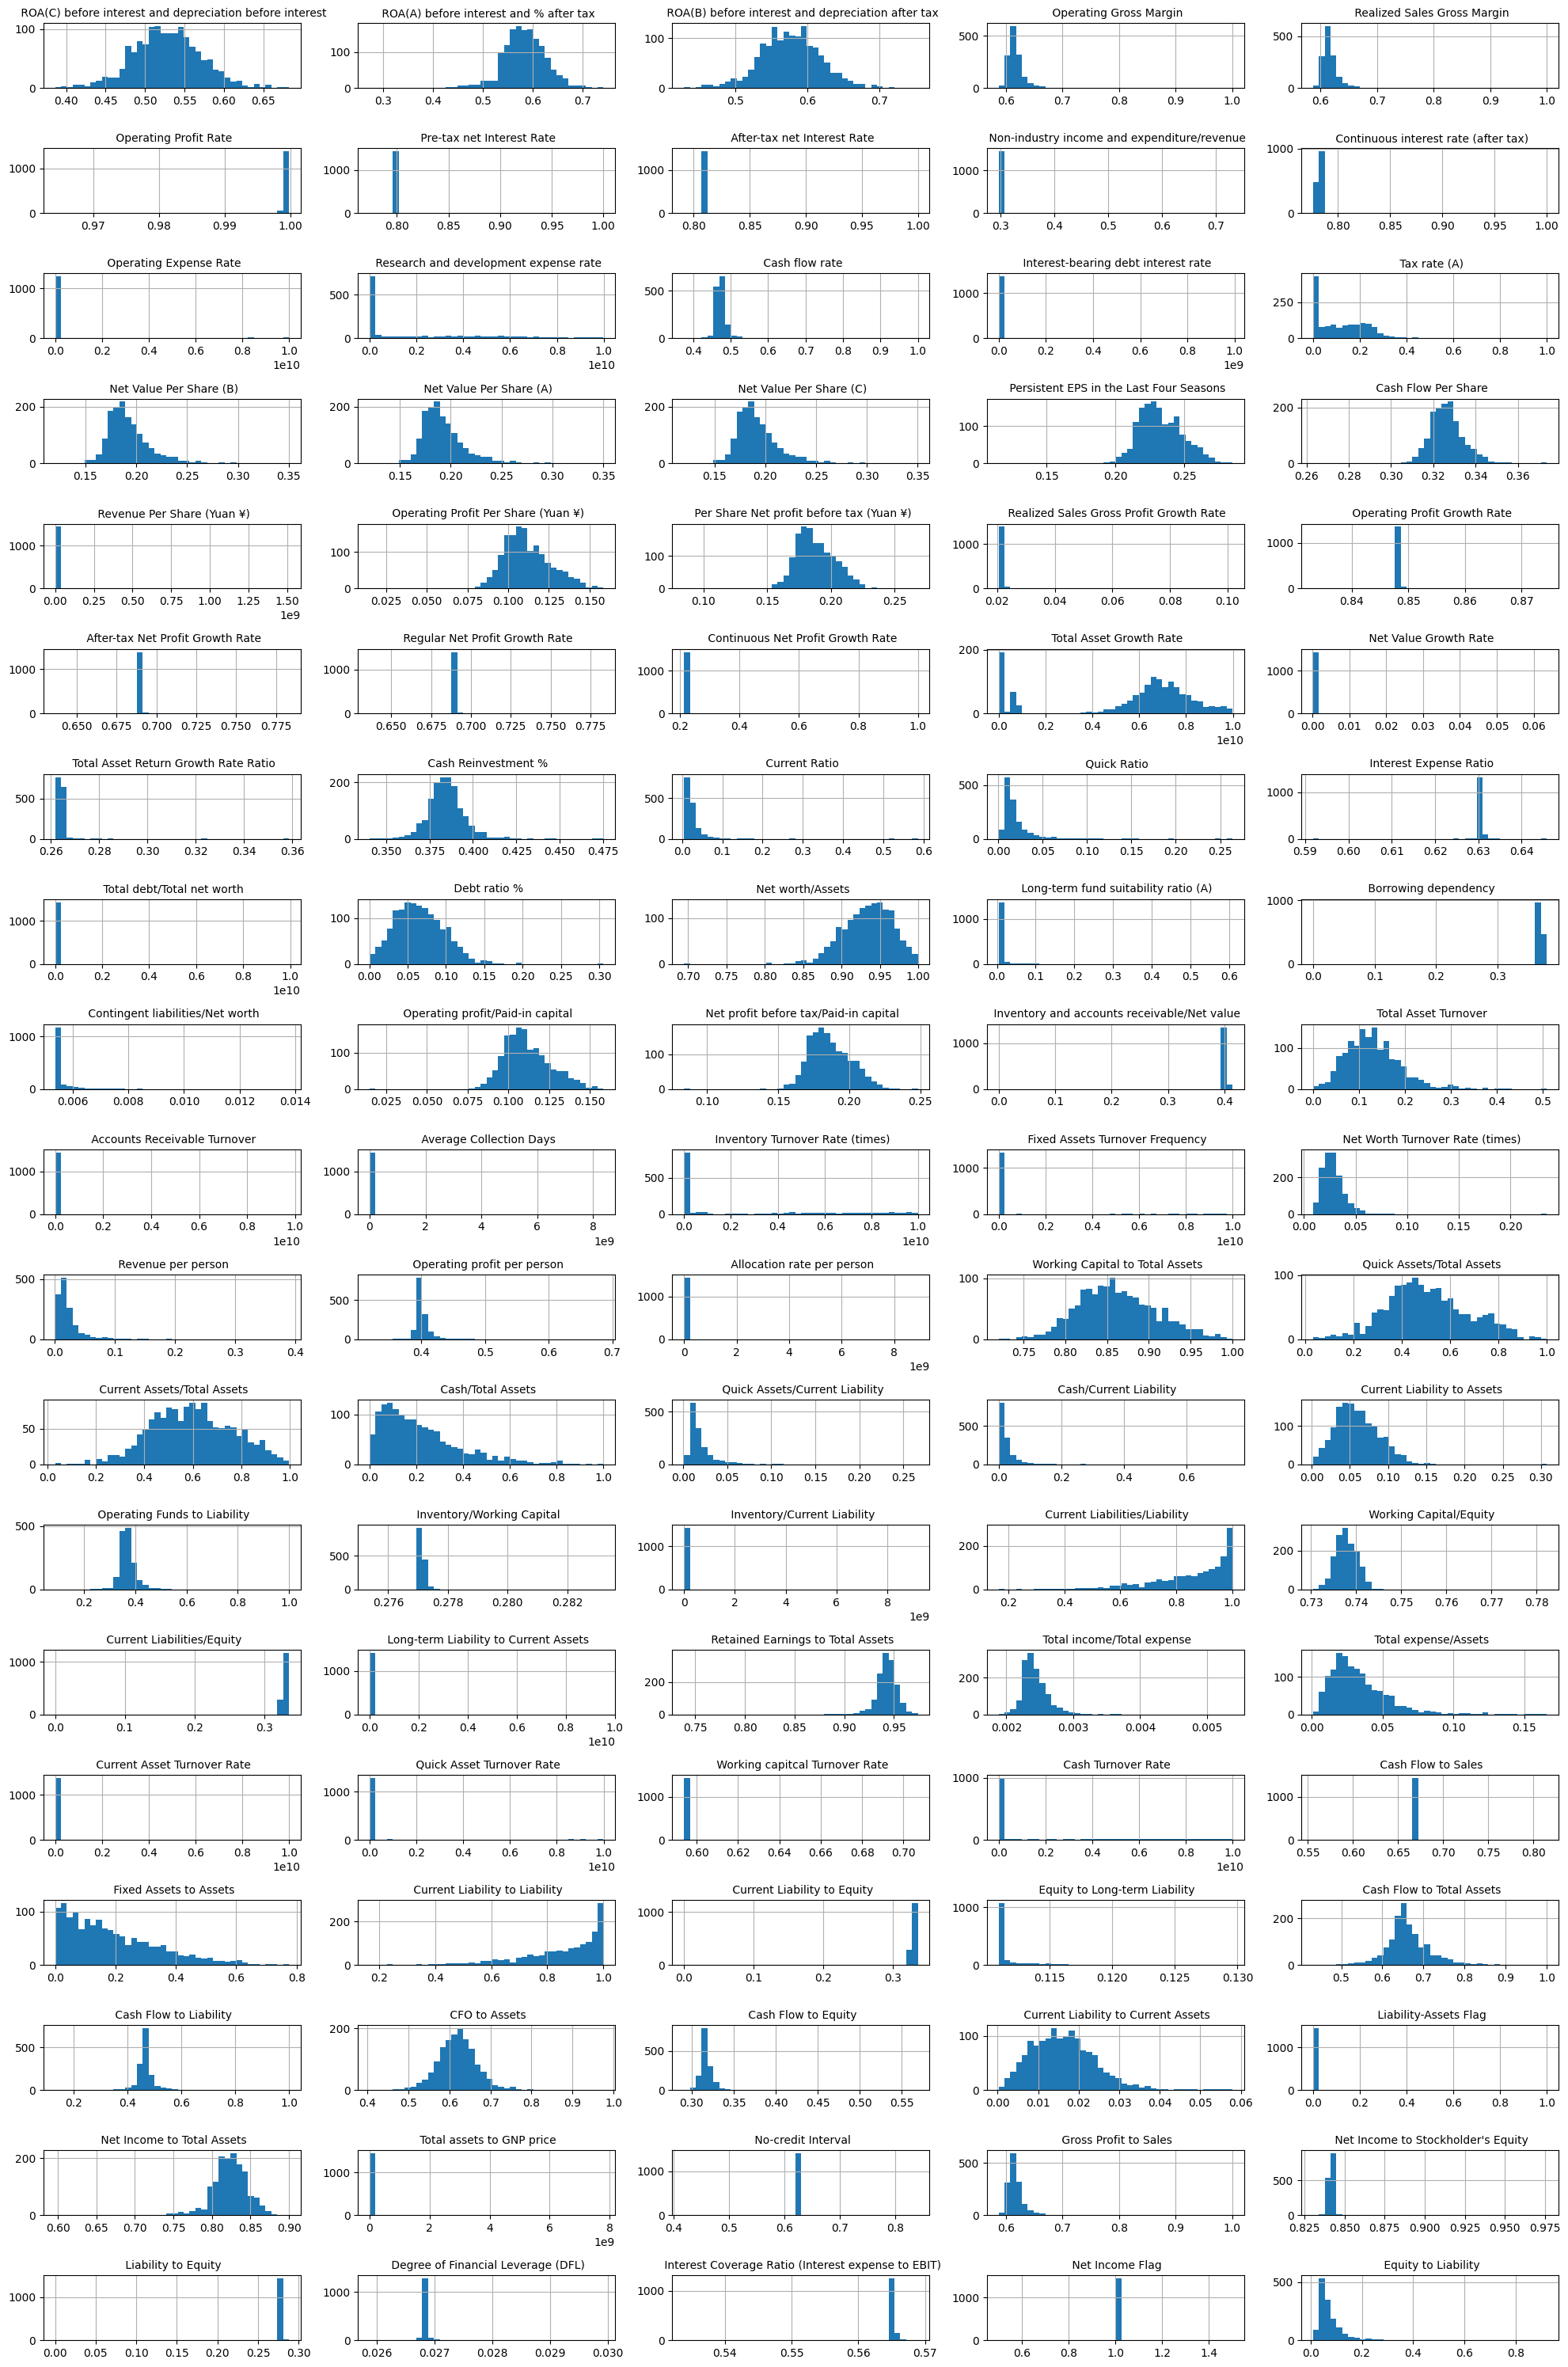

In [5]:
Key = S1[['Index', 'Bankrupt?']]
data = S1.drop(columns = ['Bankrupt?', 'Index', 'cluster'])

fig, axes = plt.subplots(ncols = 5, nrows = 19, figsize = (20, 30))
histogram = data.hist(bins = 40, ax = axes)

[x.title.set_size(10) for x in histogram.ravel()]
plt.tight_layout()
plt.show()

In [6]:
# Bankrupt companies
Key[Key['Bankrupt?'] == 1]

,Index,Bankrupt?
225,906,1
346,1466,1
898,3738,1
1109,4564,1


<br> The Net Income Flag column is always 1, so we can remove it because it's constant. <br>

In [7]:
data2 = data.drop(columns = [' Net Income Flag'])
corr = data2.corr()
corr

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
ROA(C) before interest and depreciation before interest,1.000000,0.890061,0.975552,0.098690,0.098511,0.135726,0.014283,0.009170,-0.017432,0.006182,...,-0.082652,0.861784,0.055510,-0.036961,0.098692,0.237360,0.114770,-0.102236,0.010496,-0.242705
ROA(A) before interest and % after tax,0.890061,1.000000,0.910935,0.100631,0.100388,0.121261,0.029931,0.026193,-0.001512,0.019209,...,-0.092763,0.977829,0.097270,-0.024646,0.100635,0.266293,0.128172,-0.100526,0.007698,-0.245877
ROA(B) before interest and depreciation after tax,0.975552,0.910935,1.000000,0.114496,0.114361,0.131013,0.018372,0.014682,-0.013072,0.011980,...,-0.089209,0.880436,0.109771,-0.037916,0.114498,0.236378,0.119638,-0.099221,0.008954,-0.233625
Operating Gross Margin,0.098690,0.100631,0.114496,1.000000,0.999685,-0.315722,0.160997,0.175480,0.199620,0.138089,...,-0.048686,0.095345,0.003679,-0.048509,1.000000,-0.019444,0.039114,0.003952,0.023925,0.106522
Realized Sales Gross Margin,0.098511,0.100388,0.114361,0.999685,1.000000,-0.315817,0.161235,0.175733,0.199834,0.138325,...,-0.048646,0.095434,0.003753,-0.049361,0.999685,-0.019476,0.038977,0.004598,0.024223,0.107060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,0.237360,0.266293,0.236378,-0.019444,-0.019476,0.037317,0.005964,0.004907,-0.003124,0.002518,...,0.930294,0.246751,0.028418,-0.013489,-0.019437,1.000000,-0.891330,-0.056940,-0.009529,-0.138717
Liability to Equity,0.114770,0.128172,0.119638,0.039114,0.038977,0.004741,0.009486,0.009406,0.006751,0.007996,...,-0.983378,0.145212,0.008808,-0.000116,0.039109,-0.891330,1.000000,0.038757,0.020195,-0.078509
Degree of Financial Leverage (DFL),-0.102236,-0.100526,-0.099221,0.003952,0.004598,-0.039082,0.022069,0.023915,0.026462,0.018712,...,-0.022677,-0.103517,-0.005944,-0.005051,0.003956,-0.056940,0.038757,1.000000,0.525243,-0.035744
Interest Coverage Ratio (Interest expense to EBIT),0.010496,0.007698,0.008954,0.023925,0.024223,-0.016976,0.015595,0.016314,0.016416,0.013664,...,-0.014856,0.006789,-0.002226,-0.000794,0.023923,-0.009529,0.020195,0.525243,1.000000,-0.020234


In [8]:
matrix = data2.values

StScaler = StandardScaler()
X = StScaler.fit_transform(matrix)
joblib.dump(StScaler, 'StScaler.pkl')

XPCA = PCA(n_components = 30, random_state = 559)
XPCA.fit_transform(X)
XPCA.explained_variance_ratio_.sum()

0.8725963561358371

Using 30 features, we can capture about 87% of the variance, which is a good tradeoff between number of features and power of the model.

In [9]:
X.shape

(1444, 94)

In [10]:
XPCA.components_.T.shape

(94, 30)

In [11]:
joblib.dump(XPCA, 'XPCA.pkl')

['XPCA.pkl']

# Training

Our three models will be an SVM classifier, XG Boost (Extreme Gradient Boosting), and a random forest classifier. First, we apply our PCA model for dimensionality reduction. Next, we apply SMOTE oversampling in order to reduce the class imbalance. Then, we split the modified data into training and validation sets. Finally, we perform a grid search to find optimal parameters for the models in our stacking classifier.

In [26]:
Y = Key['Bankrupt?']
XPCA = joblib.load('XPCA.pkl')
PrinComs = X @ XPCA.components_.T

SMT = SMOTE(random_state = 559, k_neighbors = 3)
XSM, YSM = SMT.fit_resample(PrinComs, Y)

Xtrain, Xval, Ytrain, Yval = train_test_split(XSM, YSM, test_size = 0.2, random_state = 559)

In [27]:
SVC_Params = {'kernel' : ['poly', 'rbf', 'sigmoid'], 'gamma' : ['scale', 'auto'], 'degree' : [2, 3, 4, 5]}
SVMclf = SVC(random_state = 559)
SVC_CV = GridSearchCV(SVMclf, SVC_Params, scoring = 'r2', cv = 5, verbose = 2, return_train_score = True)
SVC_CV.fit(Xtrain, Ytrain)
SVC_CV.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .................degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..................degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..............degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ..............degree=2, gamma=scale, k

{'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [28]:
SVC_CV.best_score_

0.9947933137564942

In [29]:
XG_Params = {'n_estimators' : [10, 25, 50, 100], 'max_depth' : [1, 2, 3], 'grow_policy' : ['depthwise', 'lossguide'], 'learning_rate' : [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}
XG = XGB.XGBClassifier(random_state = 559, booster = 'gbtree', max_leaves = 0)
XG_CV = GridSearchCV(XG, XG_Params, scoring = 'r2', cv = 5, verbose = 2, return_train_score = True)
XG_CV.fit(Xtrain, Ytrain)
XG_CV.best_params_

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END grow_policy=depthwise, learning_rate=0.1, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END grow_policy=depthwise, learn

{'grow_policy': 'depthwise',
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100}

In [30]:
XG_CV.best_score_

0.9930577516753256

In [31]:
RF_Params = {'n_estimators' : [10, 50, 100, 200], 'criterion' : ['gini', 'entropy', 'log_loss'], 'max_features' : ['sqrt', 'log2']}
RF = RandomForestClassifier(random_state = 559)
RF_CV = GridSearchCV(RF, RF_Params, scoring = 'r2', cv = 5, verbose = 2, return_train_score = True)
RF_CV.fit(Xtrain, Ytrain)
RF_CV.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_features=sqrt, n_e

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}

In [32]:
RF_CV.best_score_

1.0

In [39]:
BaseLearners = [('B1', SVC(kernel = 'rbf', gamma = 'auto', random_state = 559)), 
                ('B2', RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_features = 'sqrt', random_state = 559)),
                ('B3', XGB.XGBClassifier(booster = 'gbtree', n_estimators = 100, learning_rate = 0.1, max_depth = 3, max_leaves = 0, grow_policy = 'depthwise', random_state = 559))]

CLF = StackingClassifier(estimators = BaseLearners, final_estimator = LogisticRegression(random_state = 559), cv = 10)
CLF.fit(Xtrain, Ytrain)

StackingClassifier(cv=10,
                   estimators=[('B1', SVC(gamma='auto', random_state=559)),
                               ('B2',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=559)),
                               ('B3',
                                XGBClassifier(base_score=None, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_met...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=0,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(random_state=559))

In [40]:
joblib.dump(CLF, 'StackCLF.pkl')

['StackCLF.pkl']

# Report

Training Accuracy: 100% <br>
Confusion Matrix <br>
Table 3

In [42]:
# SVC base learner

SVC_B1 = SVC(kernel = 'rbf', gamma = 'auto', random_state = 559)
SVC_B1.fit(Xtrain, Ytrain)
print('Accuracy:', SVC_B1.score(Xval, Yval))
print('\nConfusion Matrix:')
print(confusion_matrix(Yval, SVC_B1.predict(Xval)))

Accuracy: 1.0

Confusion Matrix:
[[276   0]
 [  0 300]]


In [43]:
# Random Forest base learner

RF_B2 = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_features = 'sqrt', random_state = 559)
RF_B2.fit(Xtrain, Ytrain)
print('Accuracy:', RF_B2.score(Xval, Yval))
print('\nConfusion Matrix:')
print(confusion_matrix(Yval, RF_B2.predict(Xval)))

Accuracy: 1.0

Confusion Matrix:
[[276   0]
 [  0 300]]


In [44]:
# XG Boost base learner

XGB_B3 = XGB.XGBClassifier(booster = 'gbtree', n_estimators = 100, learning_rate = 0.1, max_depth = 3, max_leaves = 0, grow_policy = 'depthwise', random_state = 559)
XGB_B3.fit(Xtrain, Ytrain)
print('Accuracy:', XGB_B3.score(Xval, Yval))
print('\nConfusion Matrix:')
print(confusion_matrix(Yval, XGB_B3.predict(Xval)))

Accuracy: 0.9982638888888888

Confusion Matrix:
[[275   1]
 [  0 300]]


In [45]:
# Logistic Regression meta learner
CLF = joblib.load('StackCLF.pkl')
print('Accuracy:', CLF.score(Xval, Yval))
print('\nConfusion Matrix:')
print(confusion_matrix(Yval, CLF.predict(Xval)))

Accuracy: 1.0

Confusion Matrix:
[[276   0]
 [  0 300]]


In [46]:
ResData = [[1, 'Ryan Savin', '0.9994 [ 1,727 (1) ]', '1.0 [ 576 (0) ]', 30]]
ResDF = pd.DataFrame(ResData, columns = ['Subgroup ID', 'Student', 'Average Accuracy Score of Base Models [ TT (TF) ]', 'Accuracy Score of Meta Model [ TT (TF) ]', 'N_features'])
ResDF

,Subgroup ID,Student,Average Accuracy Score of Base Models [ TT (TF) ],Accuracy Score of Meta Model [ TT (TF) ],N_features
0,1,Ryan Savin,"0.9994 [ 1,727 (1) ]",1.0 [ 576 (0) ],30
